# Objective : Email-Spam-Ham-Classifier-NLP

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)

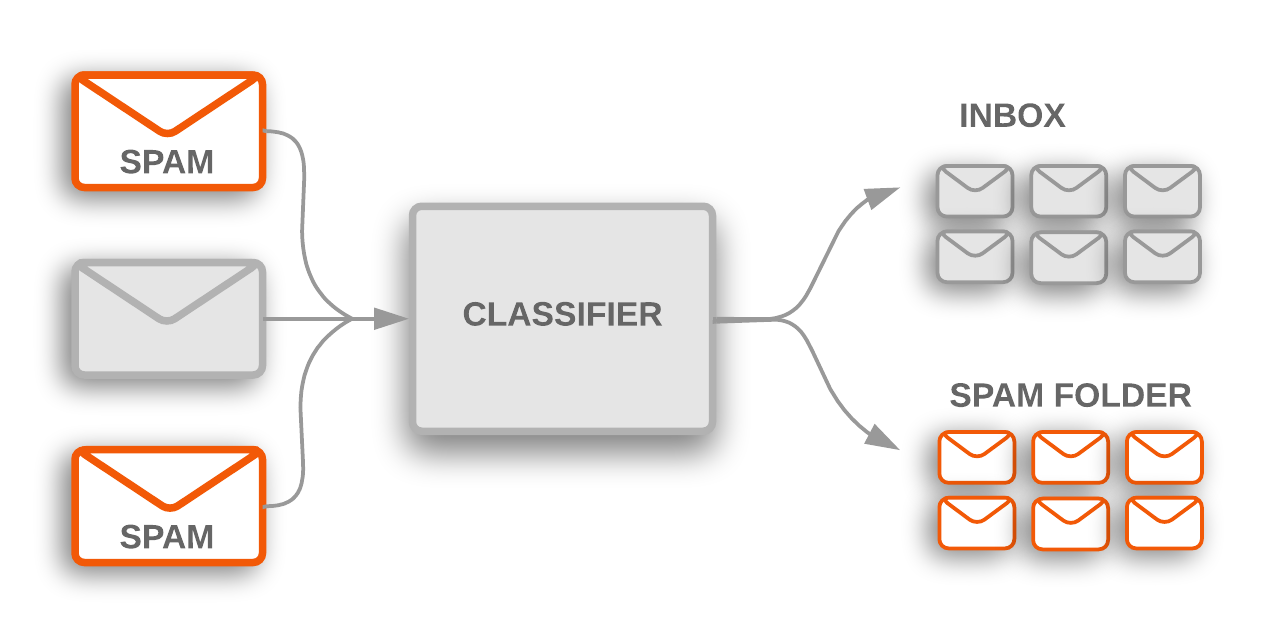

# 1. Load Python Modules

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srishanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srishanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Read the Dataset from CSV file  - Using Pandas

In [30]:
file_path=r"spam.csv"
email_df = pd.read_csv(file_path)
email_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Basic Inspection on given dataset

In [31]:
def basic_inspection_text_dataset(table):
    print("Top 5 Records of dataset")
    print(table.head())
    print()
        
    print("Bottom Records of dataset")
    print(table.tail())
    print()
    
    print("Column/features/Variable  - Names of Given dataset")
    print(table.columns)
    print()
    
    print("Shape(rows x columns) - of Given dataset")
    print(table.shape)
    print()
    
    print("Data types - Given Column Names")
    print(table.dtypes)
    print()
    
    print("Summry of dataset")
    print(table.info())
    print()
    
    print("To see the count of null/nan values in columns of dataset")
    print(table.isnull().value_counts())
    print()
    
    print("Dataset Summary ")
    print(table.describe())
    print()
    
basic_inspection_text_dataset(email_df)

Top 5 Records of dataset
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Bottom Records of dataset
     Category                                            Message
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

Column/features/Variable  - Names of Given dataset
Index(['Category', 'Message'], dtype='object')

Shape(rows x columns) - of Given dataset
(5572, 2)

Data types - Given Column Names
Ca

# 4. Dataset - Understanding

In [32]:
email_df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [33]:
email_df['spam'] = email_df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [34]:
email_df.shape

(5572, 3)

In [35]:
email_df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# 5. Create TFIDF representation using TfidfVectorizer

In [36]:
def pre_processing(text):
    words =  word_tokenize(text) 
    eng_stopwords=stopwords.words("english")
    tokens = [word for word in words if word.isalnum()]
    lower_tokens = [word.lower() for word in tokens ]

    no_punctuations_stopwords_tokens = [token for  token in lower_tokens if token not in eng_stopwords]
    return " ".join(no_punctuations_stopwords_tokens)

In [37]:
#v = CountVectorizer()
v = TfidfVectorizer()
email_df["processed_Message"]=email_df["Message"].apply(pre_processing)
X_Message_cv = v.fit_transform(email_df["processed_Message"])

# 6. Train test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_Message_cv, email_df['spam'] , test_size=0.2,random_state=42)

In [39]:
X_train.shape

(4457, 8118)

In [40]:
X_test.shape

(1115, 8118)

In [41]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [42]:
type(y_train)

pandas.core.series.Series

In [43]:
y_train[:4]

1978    1
3989    0
3935    0
4078    0
Name: spam, dtype: int64

In [44]:
v.get_feature_names_out()

array(['008704050406', '0089', '0121', ..., 'zouk', 'zyada', '〨ud'],
      dtype=object)

In [59]:
v.vocabulary_

{'go': 3293,
 'jurong': 4042,
 'point': 5522,
 'crazy': 2117,
 'available': 1142,
 'bugis': 1573,
 'great': 3373,
 'world': 7965,
 'la': 4165,
 'buffet': 1571,
 'cine': 1854,
 'got': 3336,
 'amore': 925,
 'wat': 7764,
 'ok': 5136,
 'lar': 4201,
 'joking': 4012,
 'wif': 7873,
 'oni': 5161,
 'free': 3107,
 'entry': 2712,
 'wkly': 7924,
 'comp': 1960,
 'win': 7884,
 'fa': 2842,
 'cup': 2176,
 'final': 2959,
 'tkts': 7274,
 '21st': 347,
 'may': 4605,
 '2005': 339,
 'text': 7143,
 '87121': 662,
 'receive': 5893,
 'question': 5788,
 'std': 6796,
 'txt': 7455,
 'rate': 5839,
 'apply': 1005,
 '08452810075over18': 64,
 'dun': 2569,
 'say': 6220,
 'early': 2588,
 'hor': 3648,
 'already': 903,
 'nah': 4891,
 'think': 7195,
 'goes': 3301,
 'usf': 7586,
 'lives': 4349,
 'around': 1053,
 'though': 7213,
 'freemsg': 3114,
 'hey': 3570,
 'darling': 2230,
 'week': 7805,
 'word': 7956,
 'back': 1186,
 'like': 4300,
 'fun': 3169,
 'still': 6819,
 'tb': 7085,
 'xxx': 8027,
 'chgs': 1809,
 'send': 6311,
 '

In [46]:
X_train_np = X_train.toarray()
X_train_np[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
np.where(X_train_np[0]!=0)

(array([ 340,  665, 2176, 2675, 2937, 3541, 5991, 6311, 6331, 6832, 7809,
        7884, 7965], dtype=int64),)

## 7. Train the naive bayes model

In [48]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [49]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## 8. Evaluate Performance

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[966   0]
 [ 32 117]]


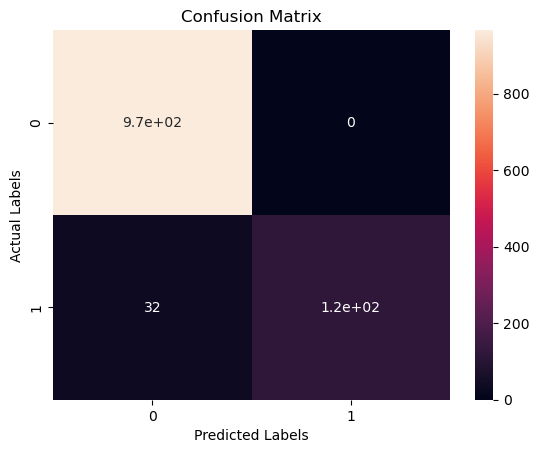

In [50]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)

# 9. Test Samples

In [51]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
processed_list = []
for i in range(len(emails)):
    processed_list.append(pre_processing(emails[i]))


emails_count = v.transform(processed_list)
model.predict(emails_count)

array([0, 0], dtype=int64)

# 10. Logistic Regression 

In [52]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model - Logistic Regression
accuracy train score overall : 0.9643257796724254
accuracy test score overall : 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.97      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

[[963   3]
 [ 50  99]]


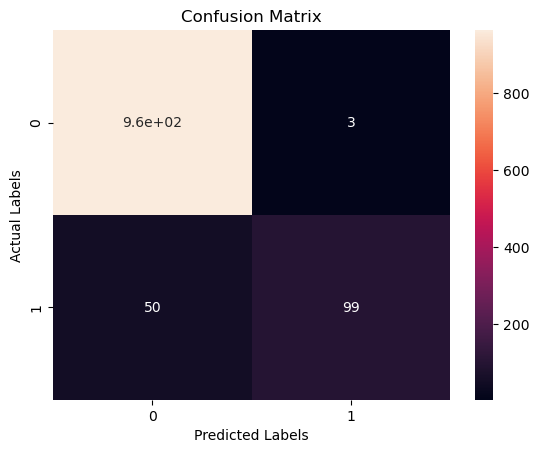

In [53]:
lg_model = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42)
lg_model.fit(X_train, y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)

In [54]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
lg_model.predict(emails_count)

array([0, 0], dtype=int64)

## Random Forest

Model- Random Forest Tree
train score: 0.9315683194974198
test score: 0.9255605381165919
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.44      0.61       149

    accuracy                           0.93      1115
   macro avg       0.96      0.72      0.79      1115
weighted avg       0.93      0.93      0.91      1115

[[966   0]
 [ 83  66]]


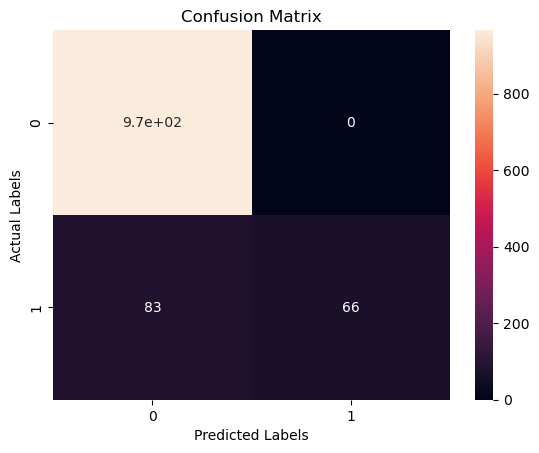

In [55]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

Model-AdaBoost
train score 0.9706080323087278
test score: 0.9695067264573991
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.93      0.83      0.88       149

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[957   9]
 [ 25 124]]


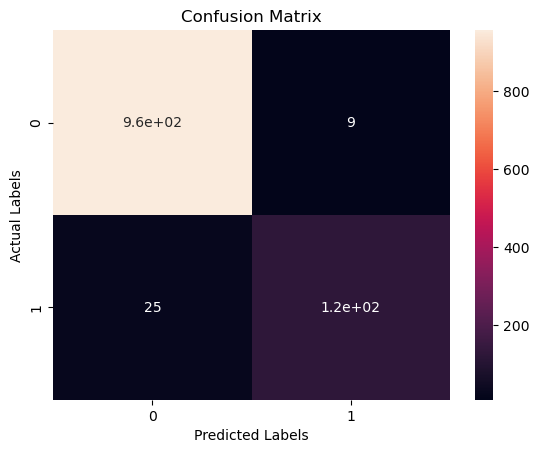

In [56]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.894772268341934
Test Accuracy: 0.8986547085201794
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.93      0.83      0.88       149

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[957   9]
 [ 25 124]]


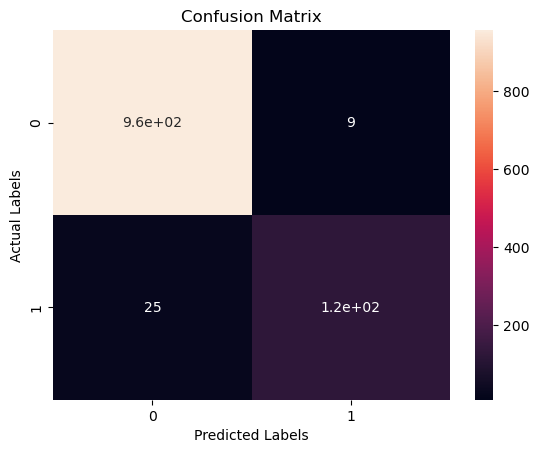

In [57]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, y_test)
print("Test Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

model- XGB Classifier
Test Accuracy: 0.9896791563832175
Test Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.93      0.85      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[957   9]
 [ 23 126]]


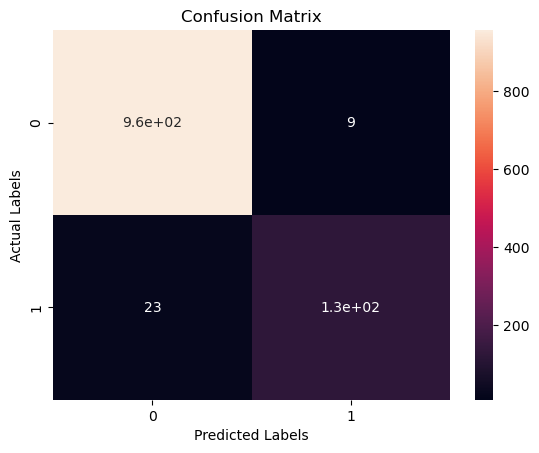

In [58]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Test Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)